In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
def Plot_Scatter(y_test, y_predict, model_name = 'Model'):
    fig = plt.figure()
    fig.suptitle(model_name)
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.scatter(y_test,y_predict)
    plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Erdeni_Houses_train.csv")

Mounted at /content/drive


In [5]:
X = df.drop(['Price', 'Address'],axis=1).values
y = df['Price'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [7]:
linmodel = LinearRegression().fit(X_train, y_train)

In [8]:
y_pred = linmodel.predict(X_test)

r2: 0.92
MAE:  80601.84197254662
RMSE:  100957.93273900214


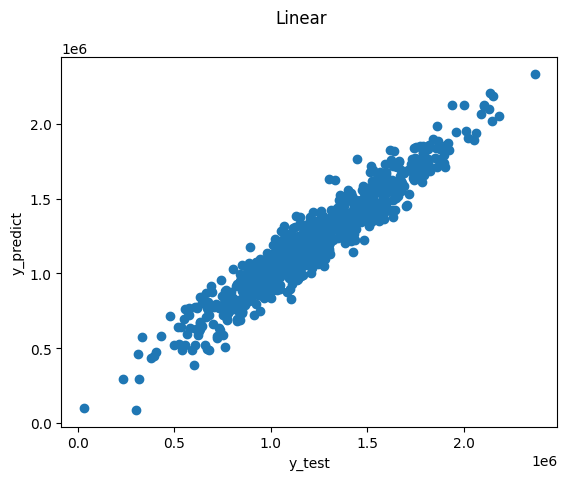

In [9]:
print("r2:", round(r2_score(y_test, y_pred), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
Plot_Scatter(y_test, y_pred, "Linear")

In [10]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
y_pred2 = knn.predict(X_test)

r2: 0.46
MAE:  203875.13750112773
RMSE:  257111.64457481008


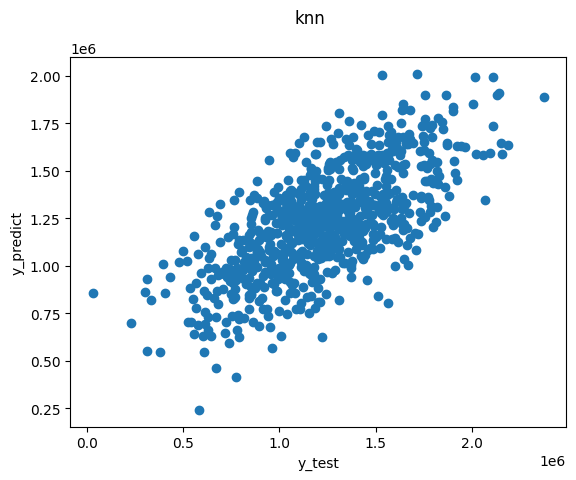

In [12]:
print("r2:", round(r2_score(y_test, y_pred2), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred2))
print("RMSE: ", mean_squared_error(y_test, y_pred2, squared=False))
Plot_Scatter(y_test, y_pred2, "knn")

In [14]:
randomforest = RandomForestRegressor(n_estimators=1500)
randomforest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1500)

In [15]:
y_pred3 = randomforest.predict(X_test)

r2: 0.87
MAE:  97612.83927484394
RMSE:  124175.71643338885


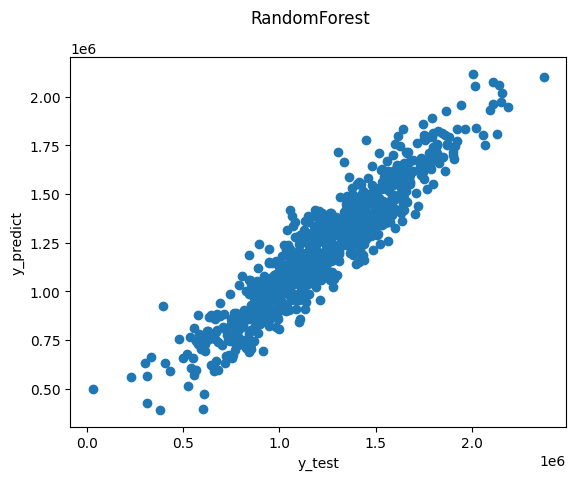

In [16]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "RandomForest")

In [43]:
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
reg = make_pipeline(StandardScaler(),
SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [44]:
y_pred3 = reg.predict(X_test)

r2: 0.92
MAE:  80612.37019188744
RMSE:  100998.14368374406


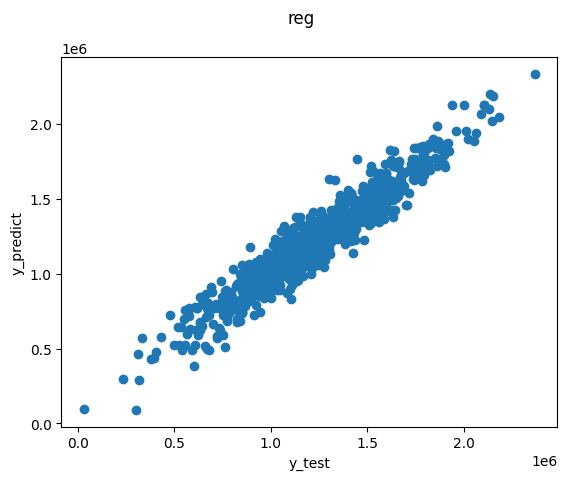

In [45]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "reg")

In [52]:
regtr = ExtraTreesRegressor(n_estimators=1000, random_state=0).fit(X_train, y_train)
regtr.score(X_test, y_test)

0.88552648588913

In [53]:
y_pred3 = regtr.predict(X_test)

r2: 0.89
MAE:  93647.84875419158
RMSE:  118223.37491811583


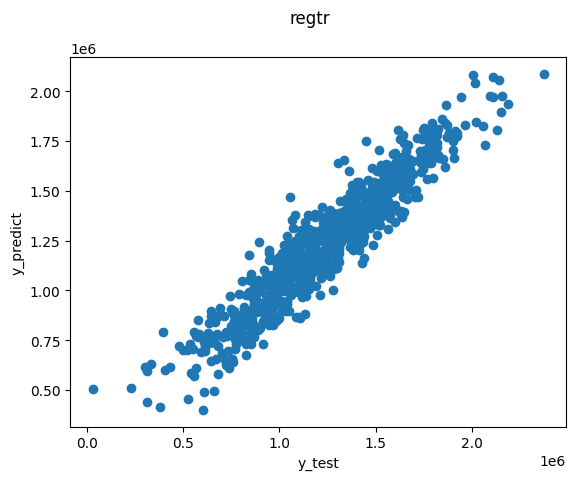

In [54]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "regtr")

In [61]:
reggb = GradientBoostingRegressor(random_state=0)
reggb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [62]:
y_pred3 = reggb.predict(X_test)

r2: 0.89
MAE:  91029.6487249487
RMSE:  114611.98211682148


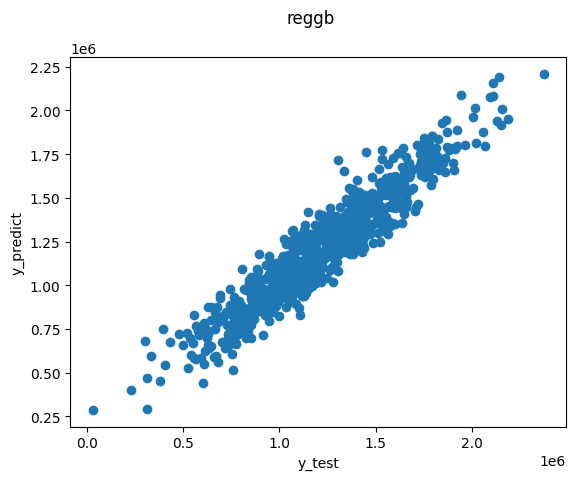

In [63]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "reggb")